#Intro

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from warnings import filterwarnings
filterwarnings('ignore')

The problem we are solving is prediction of cases of Dengue fever.

Dengue viruses are spread to people through the bite of an infected mosquito. Almost half of the world’s population, about 4 billion people, live in areas with a risk of dengue. Dengue is often a leading cause of illness in areas with risk.

By using environmental data such as temperature (which affects the spread of the disease), humidity and more, we try to predict a new outbreak of this virus. Given the recent events with COVID 19, this problem is relevant.

#Data exploration

In [39]:
data = pd.read_csv('https://raw.githubusercontent.com/Viroslav/SFE/master/DS/dengue_features_train.csv', index_col=[0,1,2])
labels = pd.read_csv('https://raw.githubusercontent.com/Viroslav/SFE/master/DS/dengue_labels_train.csv', index_col=[0,1,2])

In [41]:
data.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

In [44]:
data.columns

Index(['week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

* station_max_temp_c – Maximum temperature


* station_min_temp_c – Minimum temperature
* station_avg_temp_c – Average temperature
* station_precip_mm – Total precipitation
* station_diur_temp_rng_c – Diurnal temperature range


* reanalysis_sat_precip_amt_mm – Total precipitation
* reanalysis_dew_point_temp_k – Mean dew point temperature
* reanalysis_air_temp_k – Mean air temperature
* reanalysis_relative_humidity_percent – Mean relative humidity
* reanalysis_specific_humidity_g_per_kg – Mean specific humidity
* reanalysis_precip_amt_kg_per_m2 – Total precipitation
* reanalysis_max_air_temp_k – Maximum air temperature
* reanalysis_min_air_temp_k – Minimum air temperature
* reanalysis_avg_temp_k – Average air temperature
* reanalysis_tdtr_k – Diurnal temperature range


* ndvi_se – Pixel southeast of city centroid
* ndvi_sw – Pixel southwest of city centroid
* ndvi_ne – Pixel northeast of city centroid
* ndvi_nw – Pixel northwest of city centroid

In [45]:
data.dtypes

week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c                       float64
station_precip_mm   

As we see, the dataset contains information about two cities - San Juan (labeled sj) and Iquitos (iq). Since the cities are located at different latitudes of the globe, we may expect different patterns. So let us divide the dataset into two parts according to city name.

In [40]:
data_sj, data_iq = data.loc['sj'], data.loc['iq']
labels_sj, labels_iq = labels.loc['sj'], labels.loc['iq']

In [6]:
data_sj.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
1990 18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              299.8  ...   
     19                              300.9  ...   
     20                              300.5  ...   
     21                              301.4  ...   
     22                              301.9  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
1990 18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weeko

In [7]:
data_iq.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
2000 26              2000-07-01  0.192886  0.132257  0.340886  0.247200   
     27              2000-07-08  0.216833  0.276100  0.289457  0.241657   
     28              2000-07-15  0.176757  0.173129  0.204114  0.128014   
     29              2000-07-22  0.227729  0.145429  0.254200  0.200314   
     30              2000-07-29  0.328643  0.322129  0.254371  0.361043   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
2000 26                         25.41             296.740000   
     27                         60.61             296.634286   
     28                         55.52             296.415714   
     29                          5.60             295.357143   
     30                         62.76             296.432857   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
2000 26                     298.450000                   295.184286   
     27                     298.428571                   295.358571   
     28                     297.392857                   295.622857   
     29                     296.228571                   292.797143   
     30                     297.635714                   293.957143   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
2000 26                              307.3  ...   
     27                              306.6  ...   
     28                              304.5  ...   
     29                              303.6  ...   
     30                              307.0  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
2000 26                                    43.19   
     27                                    46.00   
     28                                    64.77   
     29                                    23.96   
     30                                    31.80   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
2000 26                                     92.418571   
     27                                     93.581429   
     28                                     95.848571   
     29                                     87.234286   
     30                                     88.161429   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
2000 26                                 25.41   
     27                                 60.61   
     28                                 55.52   
     29                                  5.60   
     30                                 62.76   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
2000 26                                      16.651429           8.928571   
     27                                      16.862857          10.314286   
     28                                      17.120000           7.385714   
     29                                      14.431429           9.114286   
     30                                      15.444286           9.500000   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
2000 26                   26.400000                10.775000   
     27                   26.900000                11.566667   
     28                   26.800000                11.466667   
     29                   25.766667                10.533333   
     30                   26.600000                11.480000   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weeko

In [47]:
data_sj.shape, data_iq.shape

((936, 21), (520, 21))

In [48]:
data_sj.isna().sum()

week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
dtype: int64

In [49]:
data_iq.isna().sum()

week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
dtype: int64

In [50]:
#data_sj.fillna(data_sj.median(), inplace=True)
#data_iq.fillna(data_iq.median(), inplace=True)

data_sj.interpolate(inplace=True)
data_iq.interpolate(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/gen

In [54]:
data_sj['total_cases'] = labels_sj.total_cases
data_iq['total_cases'] = labels_iq.total_cases


sj_correlations = data_sj.corr()
iq_correlations = data_iq.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

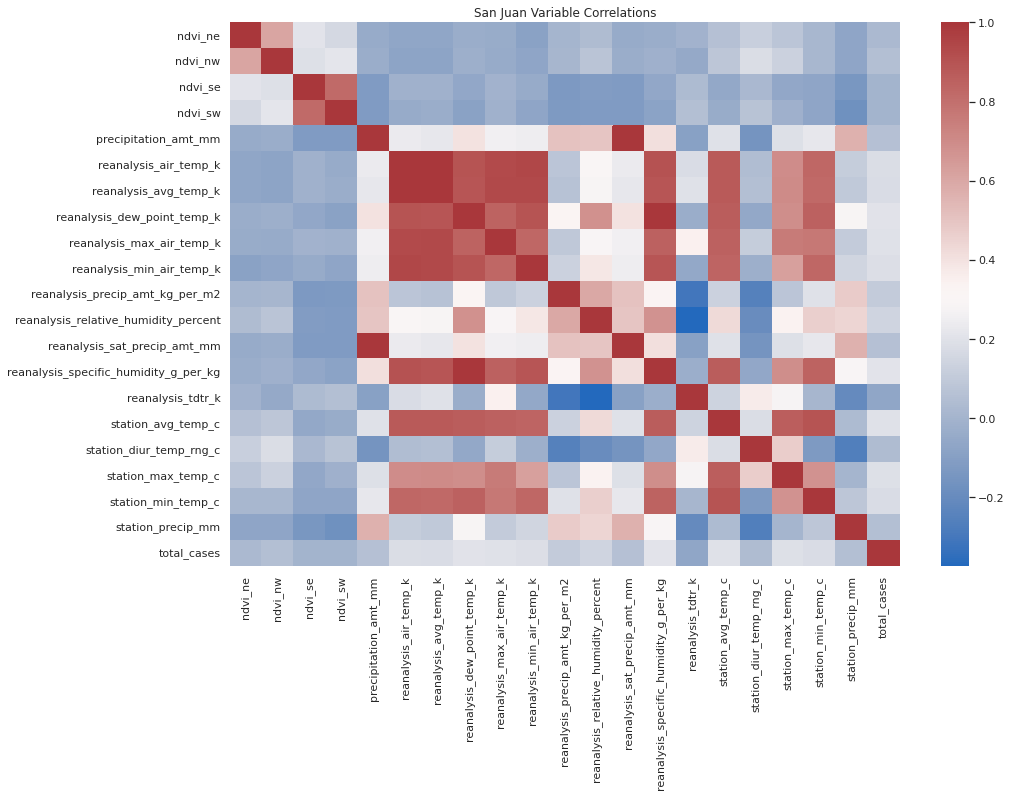

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(sj_correlations, cmap='vlag')
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

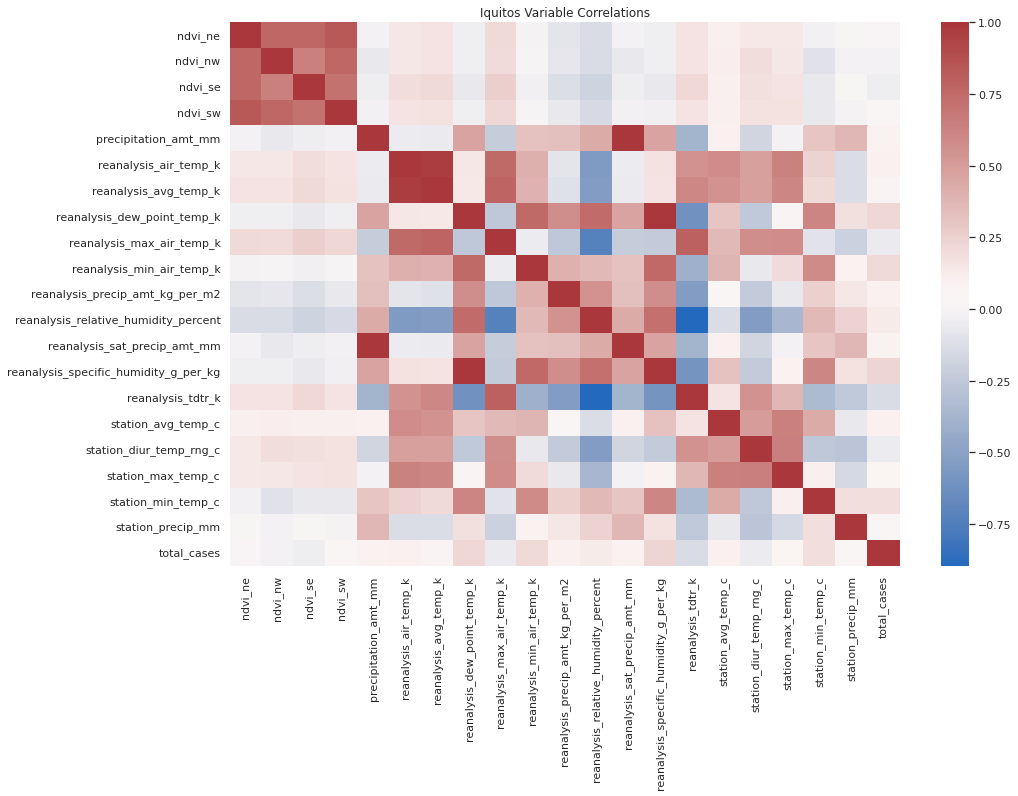

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(iq_correlations, cmap='vlag')
plt.title('Iquitos Variable Correlations')

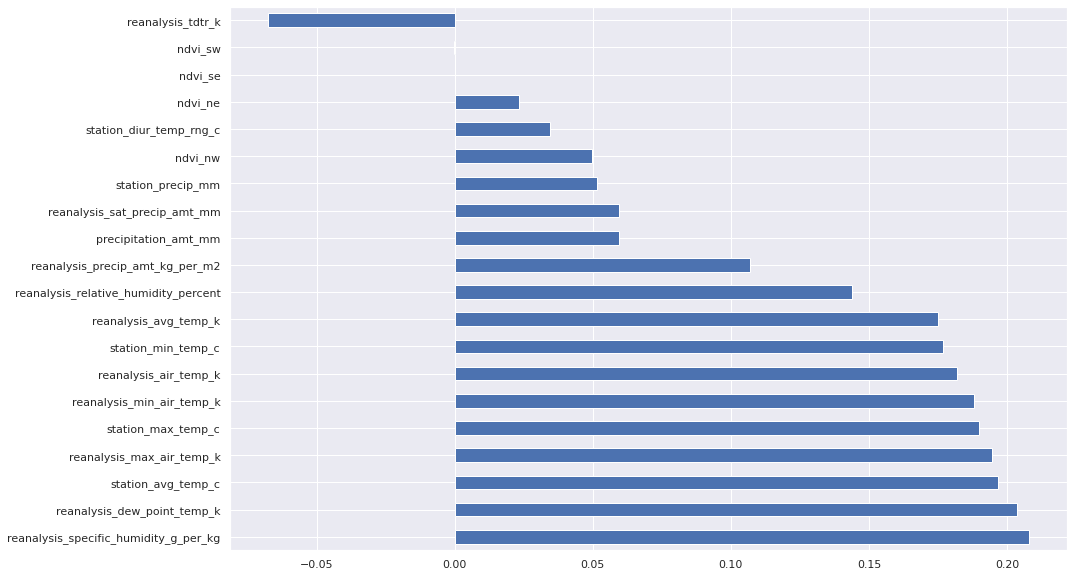

In [66]:
# San Juan
plt.figure(figsize=(15,10))
(sj_correlations
     .total_cases
     .drop('total_cases')
     .sort_values(ascending=False)
     .plot
     .barh())

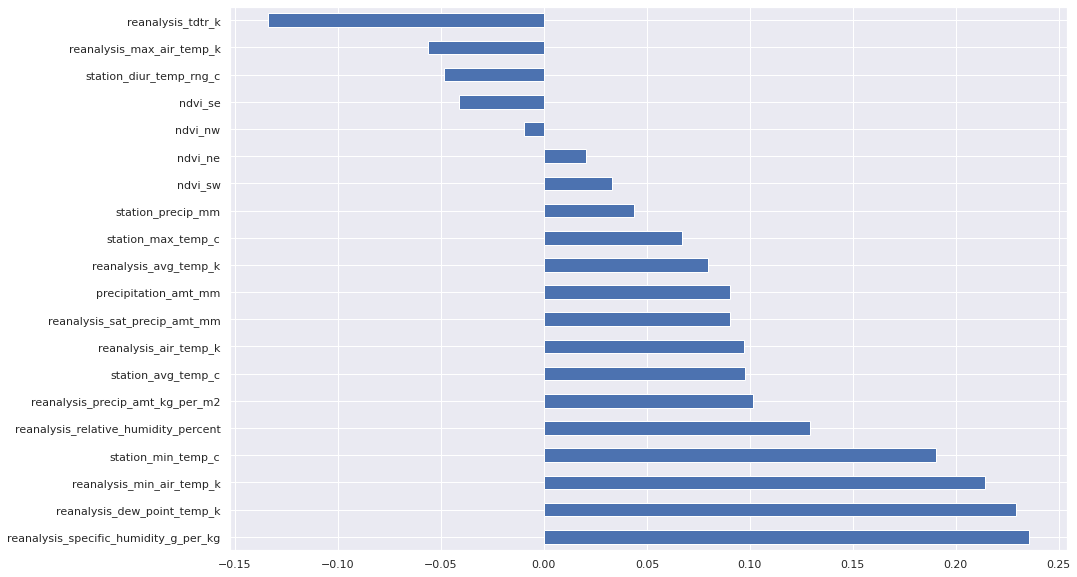

In [68]:
# Iquitos
plt.figure(figsize=(15,10))
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

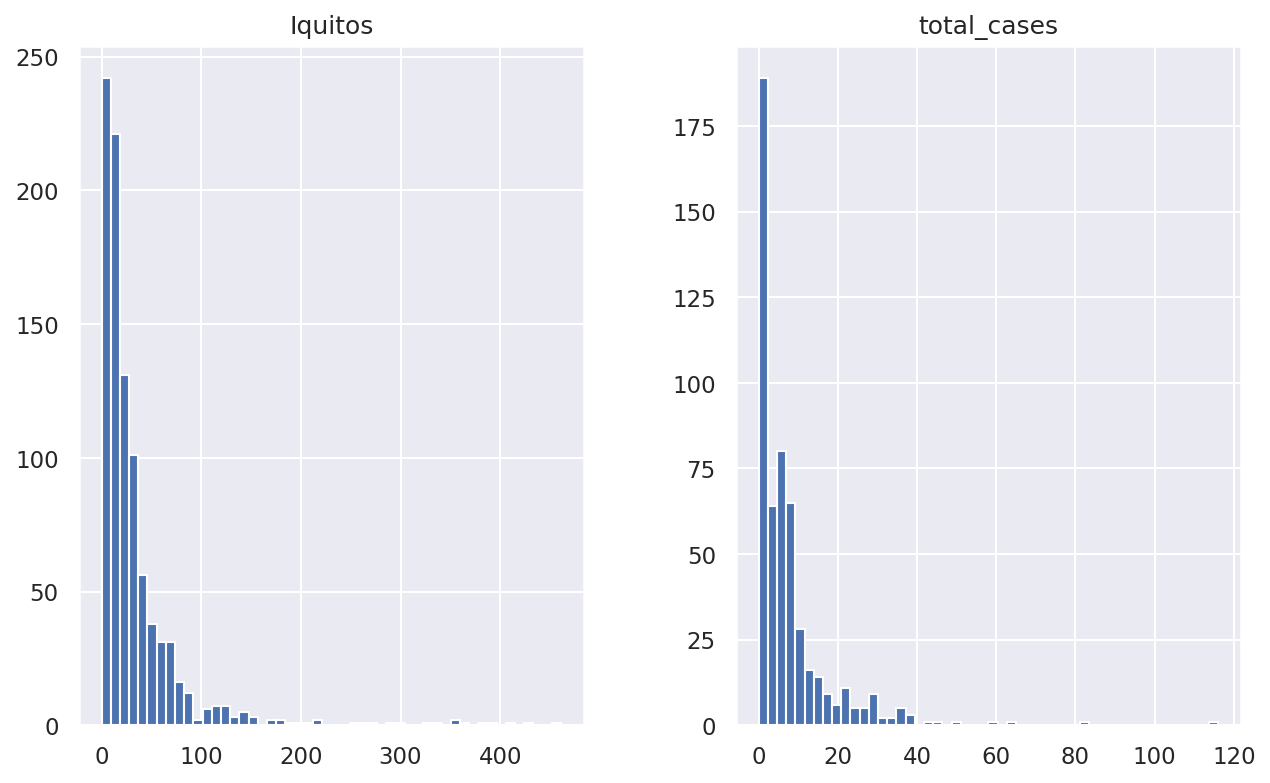

In [36]:
fig = plt.figure(figsize=(10, 6), dpi=150)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

labels_sj.hist(ax=ax1, bins=50);
ax1.title.set_text('San Juan')
labels_iq.hist(ax=ax2, bins=50);
ax1.title.set_text('Iquitos')

In [37]:
labels_iq.describe()

,total_cases
count,520.000000
mean,7.565385
std,10.765478
min,0.000000
25%,1.000000
50%,5.000000
75%,9.000000
max,116.000000


In [38]:
labels_sj.describe()

,total_cases
count,936.000000
mean,34.180556
std,51.381372
min,0.000000
25%,9.000000
50%,19.000000
75%,37.000000
max,461.000000


# Cross-validation

In [70]:
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    #features = ['reanalysis_specific_humidity_g_per_kg', 
     #            'reanalysis_dew_point_temp_k', 
      #           'station_avg_temp_c', 
       #          'station_min_temp_c']
    #df = df[features]
    

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']

    sj.interpolate(inplace=True)
    iq.interpolate(inplace=True)
    
    return sj, iq

In [185]:
data_sj, data_iq = preprocess_data('https://raw.githubusercontent.com/Viroslav/SFE/master/DS/dengue_features_train.csv', 'https://raw.githubusercontent.com/Viroslav/SFE/master/DS/dengue_labels_train.csv')

In [186]:
def train_test_split(data, test_size):
  X = data.reset_index().drop(['year', 'week_start_date'], axis=1)
  X, y = X.drop('total_cases', axis=1), X['total_cases']
  indx = int(X.shape[0] * (1 - test_size))
  return X[:indx], y[:indx], X[indx:], y[indx:]

In [187]:
def results(search, name):
  print("MAE:", mae(y_test, search.best_estimator_.predict(X_test)))
  plt.figure(figsize=(6,6), dpi=150)
  plt.plot(search.best_estimator_.predict(X_test), label='predicted');
  plt.plot(y_test.values, label='true')
  plt.title(name)
  plt.legend(loc='upper right')
  plt.show();

In [188]:
X_train, y_train, X_test, y_test = train_test_split(data_sj, 0.25)

# Ridge

MAE: 25.998848111988426


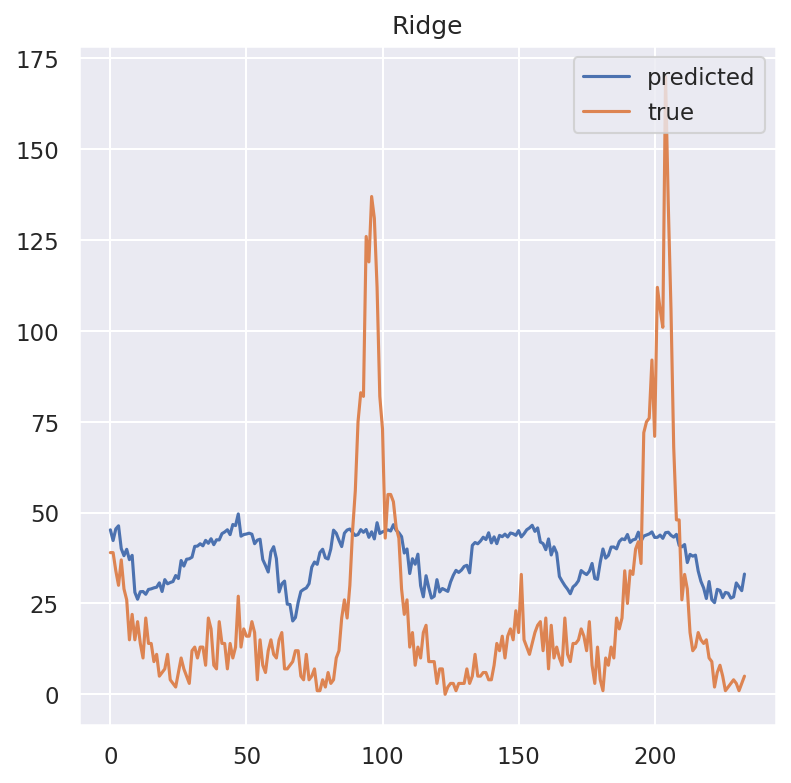

In [189]:
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error as mae

pca = PCA()

tscv = TimeSeriesSplit()
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
linear = Ridge()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("linear", linear)])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "linear__alpha": [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000],
}
search = GridSearchCV(pipe, param_grid, scoring = 'neg_mean_absolute_error', cv=tscv, n_jobs=-1)
search.fit(X_train, y_train)
results(search, 'Ridge')

# Decision Tree

MAE: 22.392064648888468


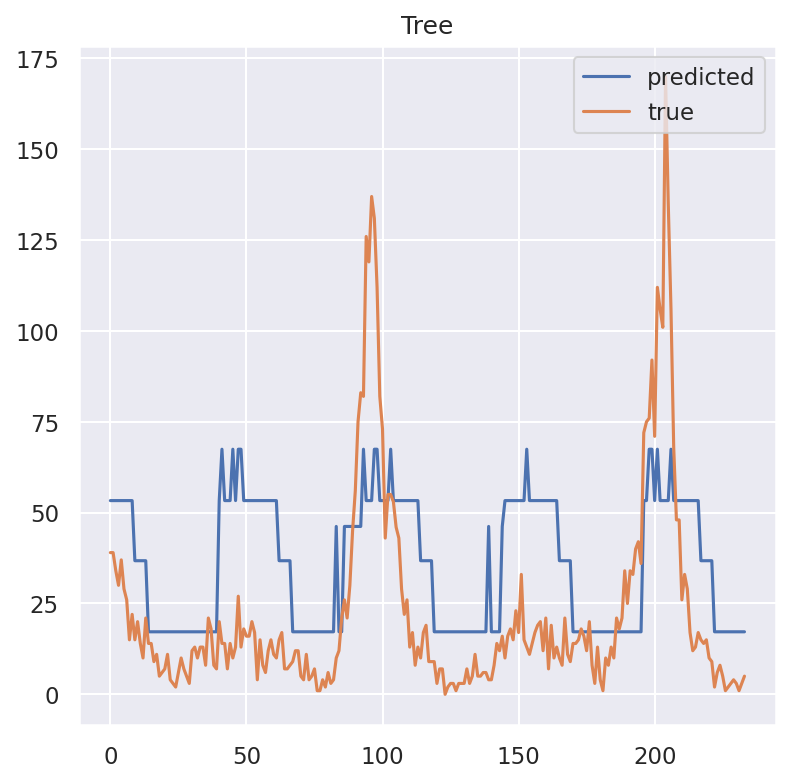

In [190]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor()
grid_tree = {'max_depth' : np.arange(3, 15, 1)}

search_tree = GridSearchCV(tree, param_grid=grid_tree, cv = tscv, scoring = 'neg_mean_absolute_error')
search_tree.fit(X_train, y_train)

results(search_tree, 'Tree')

#kNN

MAE: 24.40947940947941


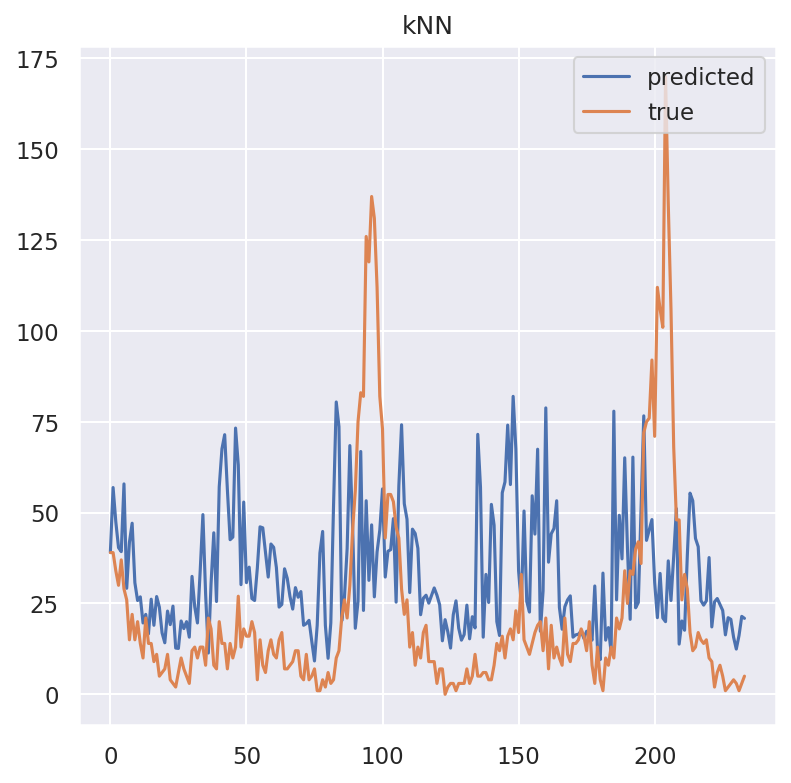

In [191]:
from sklearn.neighbors import KNeighborsRegressor


kNN = KNeighborsRegressor()
grid_knn = {'n_neighbors' : np.arange(3, 12, 1), 'weights' : ['uniform', 'distance']}

search_knn = GridSearchCV(kNN, param_grid=grid_knn, cv = tscv, scoring = 'neg_mean_absolute_error')
search_knn.fit(X_train, y_train)


pipe = Pipeline(steps=[("scaler", scaler), ("knn", kNN)])

param_grid = {
    #"pca__n_components": [5, 15, 30, 45, 60],
    "knn__n_neighbors": np.arange(3, 12, 1),
    "knn__weights": ['uniform', 'distance']
}
search_knn = GridSearchCV(pipe, param_grid, scoring = 'neg_mean_absolute_error', cv=tscv, n_jobs=-1)
search_knn.fit(X_train, y_train)

results(search_knn, 'kNN')

# Gradient Boosting

[10:56:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 22.32662280808147


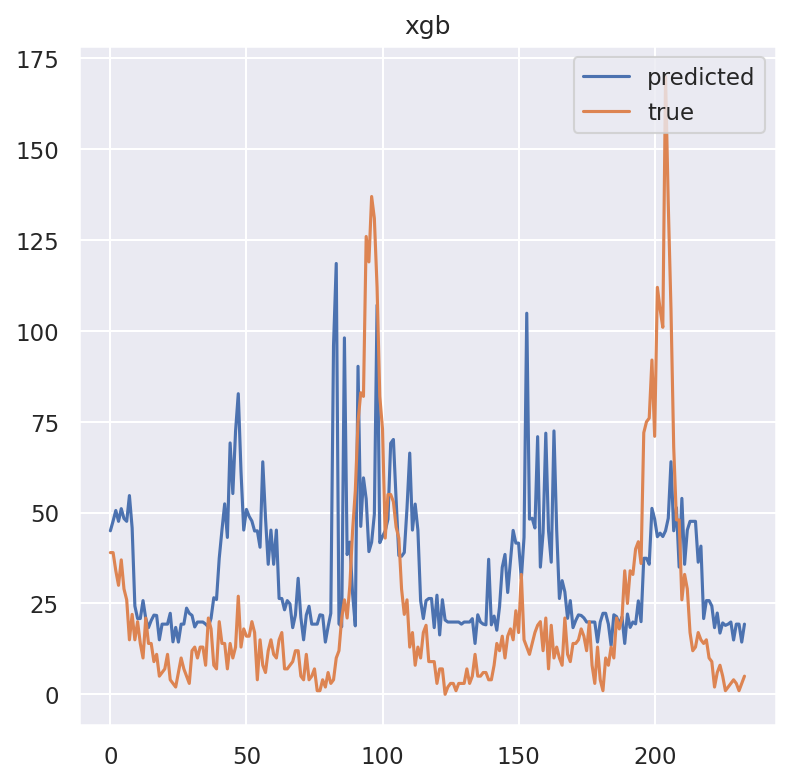

In [192]:
import xgboost as xgb

gr_boosting = xgb.XGBRegressor()



parameters = {
    'max_depth': range(2, 5, 1),
    'learning_rate': np.arange(0.05, 0.5, 0.05),
    'n_estimators': np.arange(50, 500, 25)
}


search_xgb = GridSearchCV(
    estimator=gr_boosting,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    cv = tscv
)


search_xgb.fit(X_train, y_train)

results(search_xgb, 'xgb')

In [193]:
search_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}

#Feature generation

In [194]:
X_train['new'] = X_train.station_avg_temp_c * X_train.weekofyear * X_train.reanalysis_specific_humidity_g_per_kg
X_test['new'] = X_test.station_avg_temp_c * X_test.weekofyear * X_test.reanalysis_specific_humidity_g_per_kg

MAE: 24.528165630684533


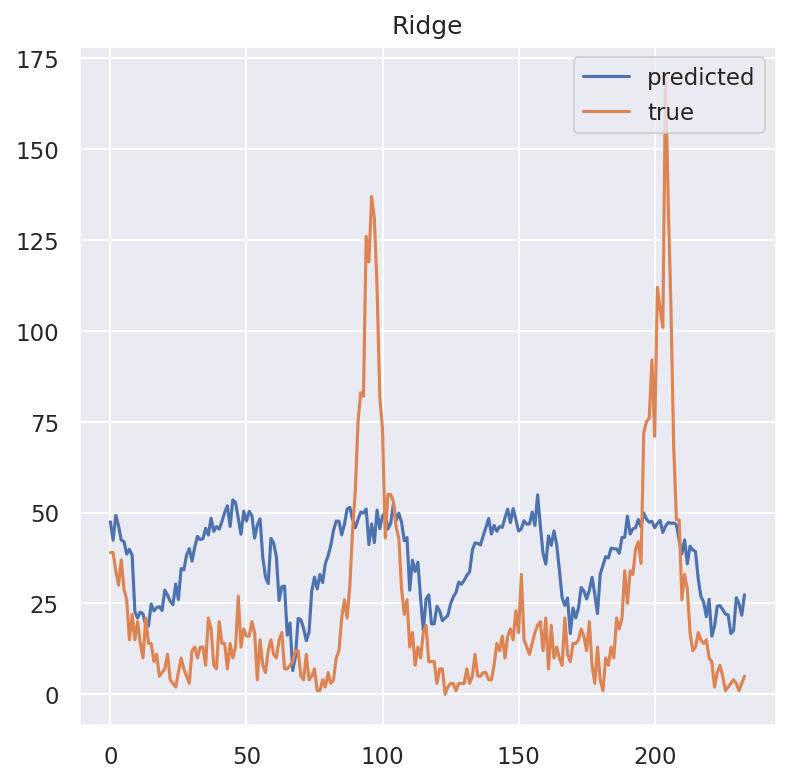

In [195]:
linear = Ridge()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("linear", linear)])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "linear__alpha": [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000],
}
search = GridSearchCV(pipe, param_grid, scoring = 'neg_mean_absolute_error', cv=tscv, n_jobs=-1)
search.fit(X_train, y_train)
results(search, 'Ridge')

[11:02:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 22.058165546156403


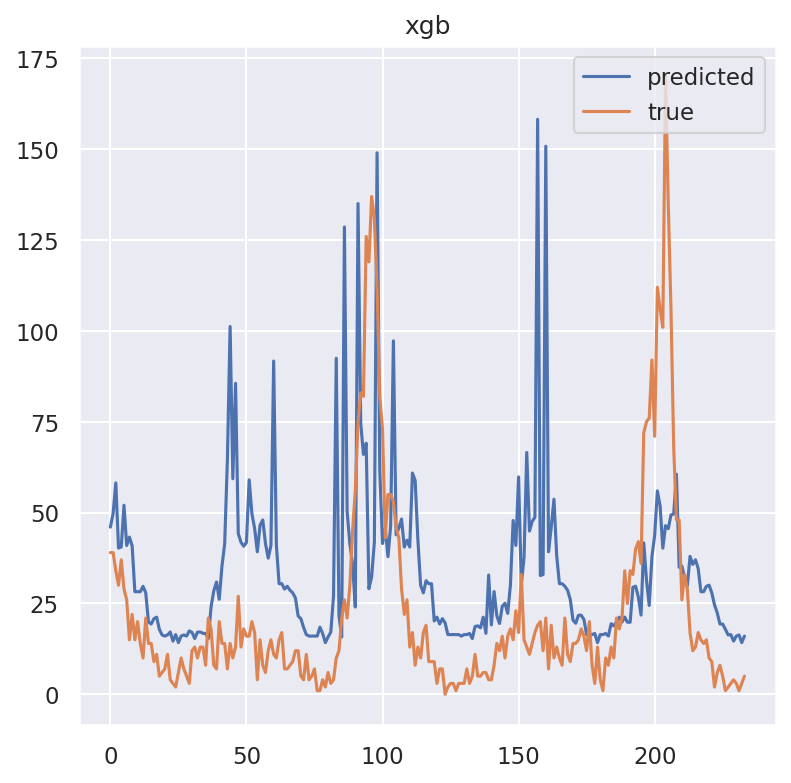

In [196]:
gr_boosting = xgb.XGBRegressor()



parameters = {
    'max_depth': range(2, 5, 1),
    'learning_rate': np.arange(0.05, 0.5, 0.05),
    'n_estimators': np.arange(50, 500, 25)
}


search_xgb = GridSearchCV(
    estimator=gr_boosting,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    cv = tscv
)


search_xgb.fit(X_train, y_train)

results(search_xgb, 'xgb')

In [197]:
search_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}

##Same for Iquitos

[11:06:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 7.9399243501516485


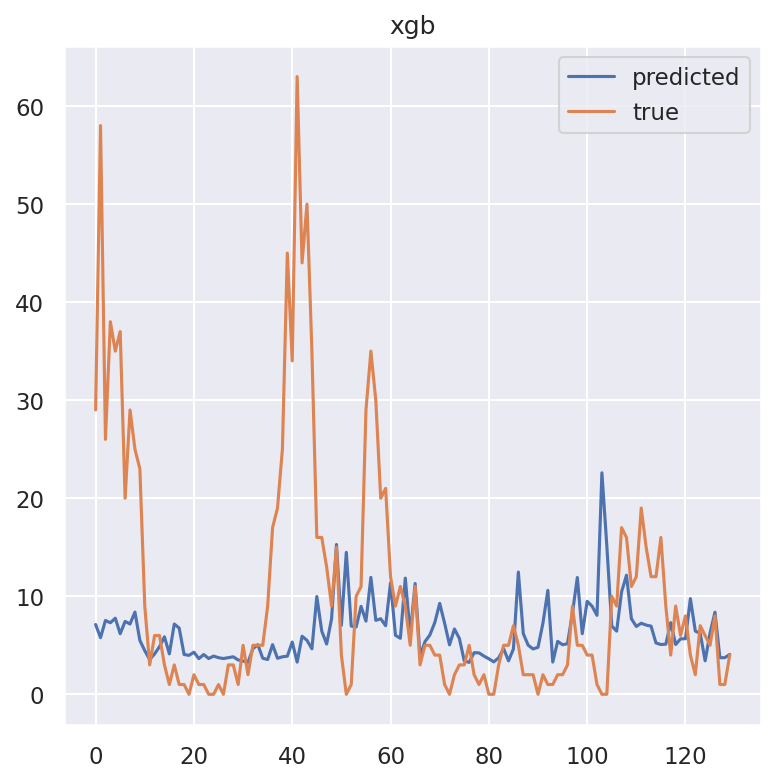

In [198]:
X_train, y_train, X_test, y_test = train_test_split(data_iq, 0.25)

X_train['new'] = X_train.station_avg_temp_c * X_train.weekofyear * X_train.reanalysis_specific_humidity_g_per_kg
X_test['new'] = X_test.station_avg_temp_c * X_test.weekofyear * X_test.reanalysis_specific_humidity_g_per_kg



gr_boosting = xgb.XGBRegressor()



parameters = {
    'max_depth': range(2, 5, 1),
    'learning_rate': np.arange(0.05, 0.5, 0.05),
    'n_estimators': np.arange(50, 500, 25)
}


search_xgb = GridSearchCV(
    estimator=gr_boosting,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1,
    cv = tscv
)


search_xgb.fit(X_train, y_train)

results(search_xgb, 'xgb')

In [199]:
search_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}

#Submission

In [200]:
X_1, y_1, _, _ = train_test_split(data_sj, 0)
X_2, y_2, _, _ = train_test_split(data_iq, 0)

In [201]:
for X in [X_1, X_2]:
  X['new'] = X.station_avg_temp_c * X.weekofyear * X.reanalysis_specific_humidity_g_per_kg

In [202]:
gr_1 = xgb.XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=50)
gr_2 = xgb.XGBRegressor(learning_rate=0.05, max_depth=2, n_estimators=50)
gr_1.fit(X_1, y_1)
gr_2.fit(X_2, y_2)

[11:08:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, max_depth=2, n_estimators=50)

In [203]:
test_1, test_2 = preprocess_data('https://raw.githubusercontent.com/Viroslav/SFE/master/DS/dengue_features_test.csv')

In [204]:
for X in [test_1, test_2]:
  X.reset_index(inplace=True)
  X.drop(['year', 'week_start_date'], axis=1, inplace=True)
  X['new'] = X.station_avg_temp_c * X.weekofyear * X.reanalysis_specific_humidity_g_per_kg

In [205]:
predicted_sj = gr_1.predict(test_1).astype(int)
predicted_iq = gr_2.predict(test_2).astype(int)

In [206]:
predicted = np.hstack((predicted_sj, predicted_iq))
predicted_df = pd.DataFrame(predicted.T, columns = ['total_cases'])
submission = pd.read_csv('https://raw.githubusercontent.com/Viroslav/SFE/master/DS/submission_format.csv')
submission = submission.drop('total_cases', axis = 1)
submission = pd.concat([submission, predicted_df], axis = 1)
submission.to_csv('sub.csv', index=False)